# **EDA-6**

In [126]:
import pandas as pd
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
import matplotlib.pyplot as plt

#### 导入reviews数据

In [94]:
all_reviews = pd.read_csv('/content/drive/My Drive/data/data/2020-12/reviews.csv')

In [95]:
all_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am..."


#### 将date转为datetime数据后，分离成年月日

In [96]:
all_reviews['date'] = pd.to_datetime(all_reviews['date'])

In [97]:
all_reviews['year'] = all_reviews['date'].dt.year
all_reviews['month'] = all_reviews['date'].dt.month
all_reviews['day'] = all_reviews['date'].dt.day

In [98]:
all_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month,day
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...,2013,10,21
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...,2014,4,18
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...,2014,6,5
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...,2014,7,2
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am...",2014,7,8


#### 分析每月评论总数量

In [99]:
all_reviews.month.value_counts().sort_index()

1     5264
2     4206
3     3874
4     3732
5     3806
6     4077
7     5087
8     5135
9     4822
10    4604
11    4450
12    4927
Name: month, dtype: int64

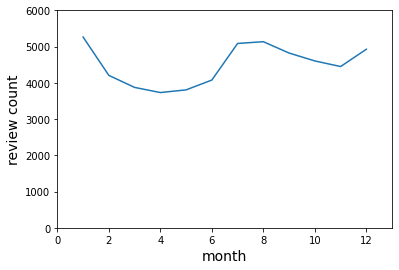

In [101]:
plt.plot(all_reviews.month.value_counts().sort_index())
plt.xlim(0,13)
plt.ylim(0,6000)
plt.xlabel('month', fontsize=14)
plt.ylabel('review count', fontsize=14)
plt.show()

#### 分析2011-2020年每个月评论的数量

In [102]:
all_reviews["year_month"] = pd.to_datetime(all_reviews["year"].astype(str)+"-"+all_reviews["month"].astype(str)).dt.to_period('M')

In [103]:
all_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month,day,year_month
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...,2013,10,21,2013-10
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...,2014,4,18,2014-04
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...,2014,6,5,2014-06
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...,2014,7,2,2014-07
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am...",2014,7,8,2014-07


In [104]:
all_reviews.year_month.value_counts().sort_index()

2011-05      2
2011-06      2
2011-07      3
2011-08      4
2011-09      4
          ... 
2020-09    416
2020-10    418
2020-11    501
2020-12    521
2021-01     11
Freq: M, Name: year_month, Length: 116, dtype: int64

In [105]:
reviews = all_reviews.year_month.value_counts().sort_index().tolist()

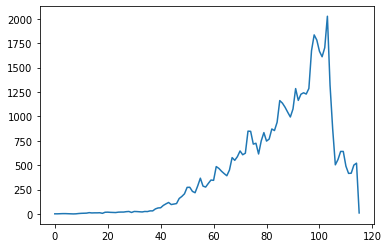

In [106]:
plt.plot(reviews)

<BarContainer object of 116 artists>

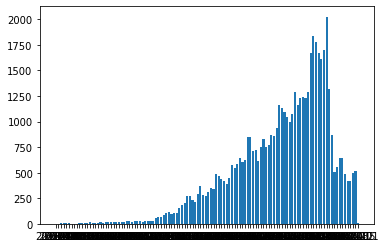

In [122]:
col = pd.unique(all_reviews.year_month.astype(str))
plt.bar(col,reviews)

<BarContainer object of 11 artists>

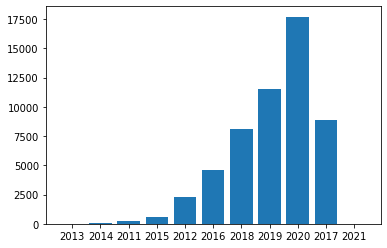

In [124]:
years = pd.unique(all_reviews.year.astype(str))
plt.bar(years,all_reviews.year.value_counts().sort_index())